In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


In [5]:
df = pd.read_csv("creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
db_path = "credit.db"
conn = sqlite3.connect(db_path)
table_name = "transactions"
df.to_sql(table_name, conn, if_exists = "replace", index = False)
print("Saved to SQLite:", db_path)
print("Rows written:", conn.execute(f"SELECT COUNT(*) FROM {table_name}").fetchone()[0])
conn.close() 

Saved to SQLite: credit.db
Rows written: 284807


In [15]:
conn = sqlite3.connect("credit.db")
pd.read_sql("SELECT * FROM transactions LIMIT 5;", conn)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
sql = """
SELECT
    STRFTIME('%H', DATETIME(Time, 'unixepoch')) AS hour,
    COUNT(*) AS transactions_count
FROM transactions
GROUP BY hour
ORDER BY hour;
"""

df_hour = pd.read_sql(sql, conn)
df_hour


,hour,transactions_count
0,00,7695
1,01,4220
2,02,3328
3,03,3492
4,04,2209
5,05,2990
6,06,4101
7,07,7243
8,08,10276
9,09,15838


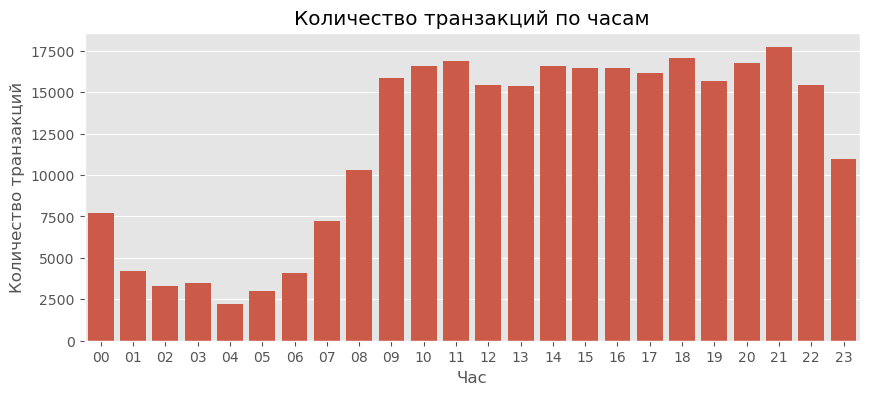

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

sns.barplot(
    data=df_hour,
    x="hour",
    y="transactions_count"
)

plt.title("Количество транзакций по часам")
plt.xlabel("Час")
plt.ylabel("Количество транзакций")
plt.show()


In [27]:
sql = """SELECT
    STRFTIME('%H', DATETIME(Time, 'unixepoch')) AS hour,
    Class,
    COUNT(*) AS transactions_count
FROM transactions
GROUP BY hour, Class"""

df_hour_class = pd.read_sql(sql, conn)
df_hour_class

,hour,Class,transactions_count
0,00,0,7689
1,00,1,6
2,01,0,4210
3,01,1,10
4,02,0,3271
5,02,1,57
6,03,0,3475
7,03,1,17
8,04,0,2186
9,04,1,23


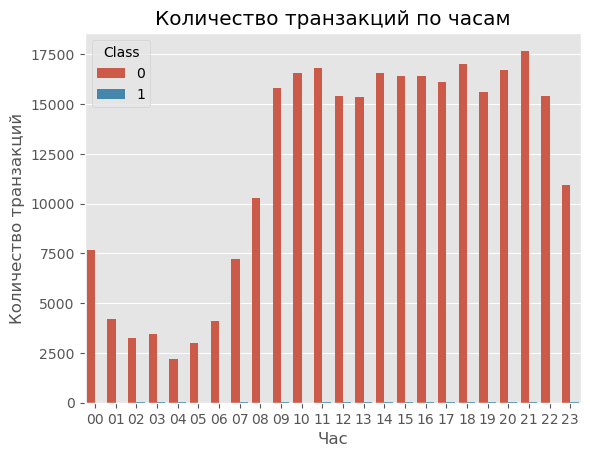

In [35]:
sns.barplot(
    data=df_hour_class,
    x="hour",
    y="transactions_count",
    hue="Class"
)

plt.title("Количество транзакций по часам")
plt.xlabel("Час")
plt.ylabel("Количество транзакций")
plt.show() 


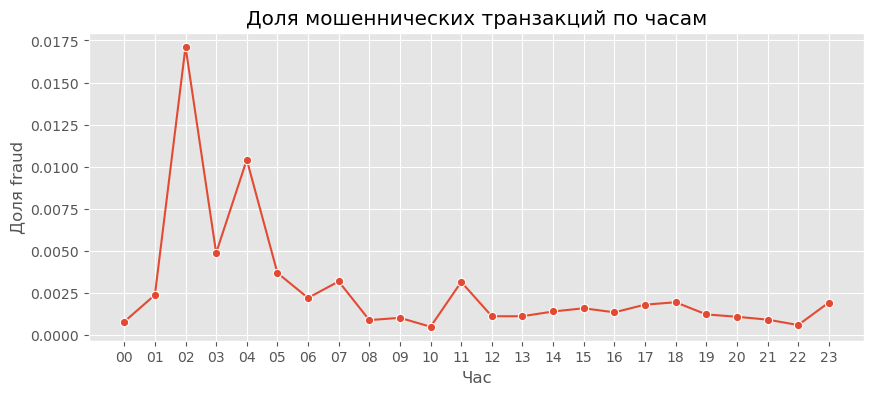

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sql = """
SELECT
    STRFTIME('%H', DATETIME(Time, 'unixepoch')) AS hour,
    COUNT(*) AS total_transactions,
    SUM(Class) AS fraud_transactions,
    1.0 * SUM(Class) / COUNT(*) AS fraud_rate
FROM transactions
GROUP BY hour
ORDER BY hour;
"""

df_fraud_rate = pd.read_sql(sql, conn)
df_fraud_rate


plt.figure(figsize=(10, 4))

sns.lineplot(
    data=df_fraud_rate,
    x="hour",
    y="fraud_rate",
    marker="o"
)

plt.title("Доля мошеннических транзакций по часам")
plt.xlabel("Час")
plt.ylabel("Доля fraud")
plt.show()
